In [332]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Load the dataset (assuming it's stored in a pandas DataFrame)
import pandas as pd
df = pd.read_csv(r'C:\Users\Hello\Downloads\iris_modified.csv')  # Update with the actual path to your dataset file


In [333]:
# Define the perceptron parameters with float64 data type
weights = np.array([1.0, 1.0], dtype=np.float64)
bias = -3.08  # Also cast to float64
learning_rate = 0.1

In [334]:
df=df.drop('Unnamed: 0',axis=1)

In [335]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [337]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000
std,0.641698,0.478739,1.449549,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [338]:
import seaborn as sns

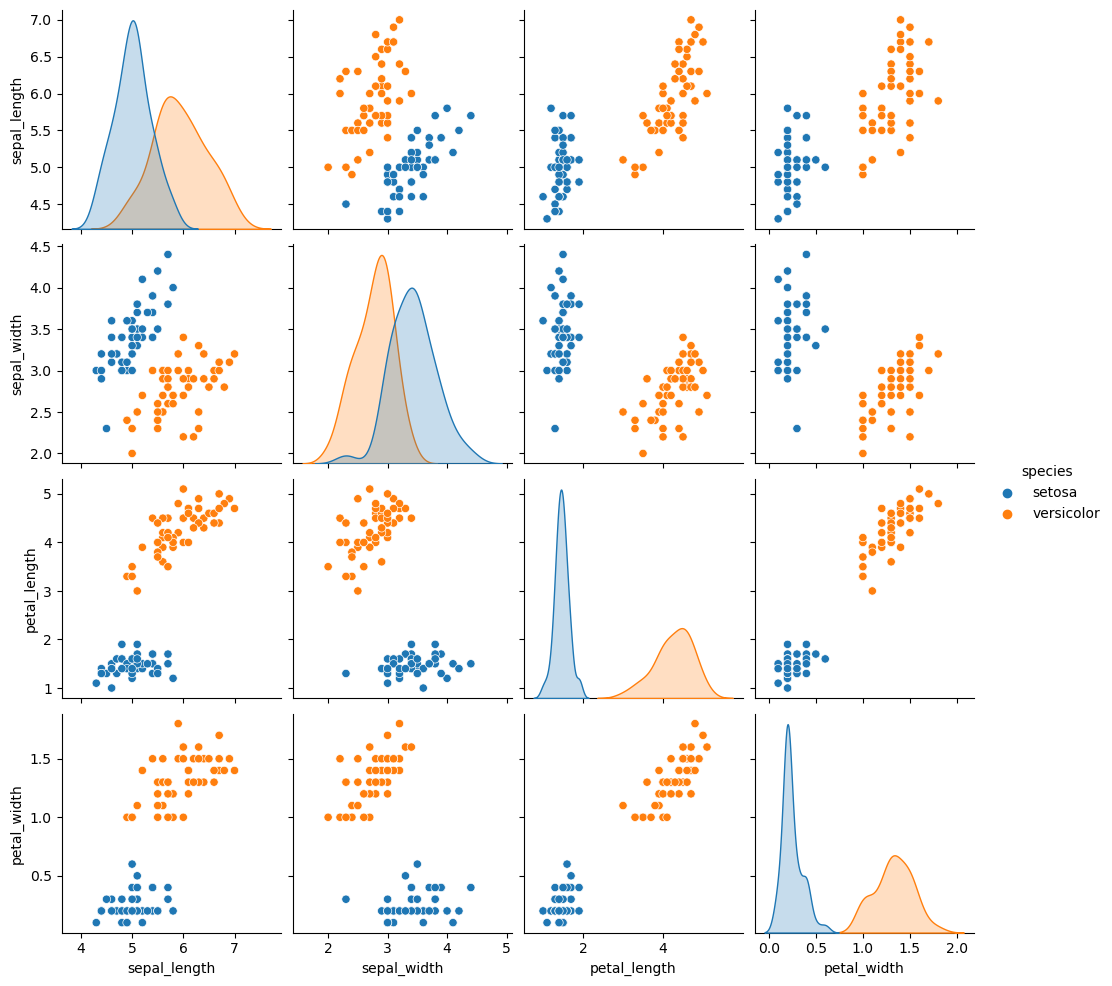

In [339]:
sns.pairplot(data=df,hue='species')

In [340]:
df_2 = df[['petal_length','petal_width','species']]

In [341]:
df_2

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
95,4.2,1.2,versicolor
96,4.2,1.3,versicolor
97,4.3,1.3,versicolor
98,3.0,1.1,versicolor


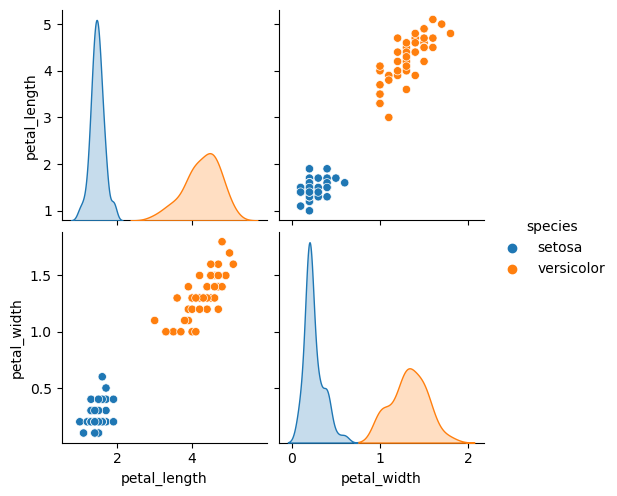

In [342]:
sns.pairplot(data=df_2,hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

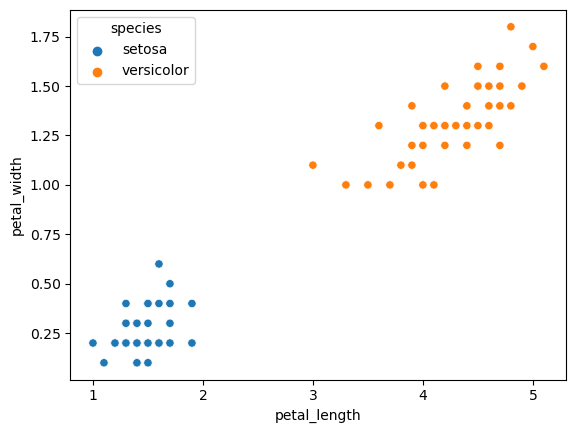

In [343]:
sns.scatterplot(x=df_2.petal_length,y=df_2.petal_width,hue=df_2.species)

In [344]:
# Convert labels to binary (Iris Setosa vs. others)
df_2['species'] = np.where(df_2['species'] == 'setosa', 0, 1)

C:\Users\Hello\AppData\Local\Temp\ipykernel_8336\1999799339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['species'] = np.where(df_2['species'] == 'setosa', 0, 1)


In [345]:
# Assuming 'species' column has labels encoded as integers
X = df_2[['petal_length', 'petal_width']].values
y = df_2['species'].values


In [346]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [347]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [348]:
# Train the perceptron
for i in range(len(X)):
    # Calculate activation
    activation = np.dot(X[i], weights) + bias
    
    # Update weights and bias
    if activation >= 0:
        y_pred = 1
    else:
        y_pred = 0
    error = y[i] - y_pred
    weights += learning_rate * error * X[i]
    bias += learning_rate * error

In [349]:
# Predictions
predictions = []
for i in range(len(X)):
    activation = np.dot(X[i], weights) + bias
    if activation >= 0:
        predictions.append(1)
    else:
        predictions.append(0)

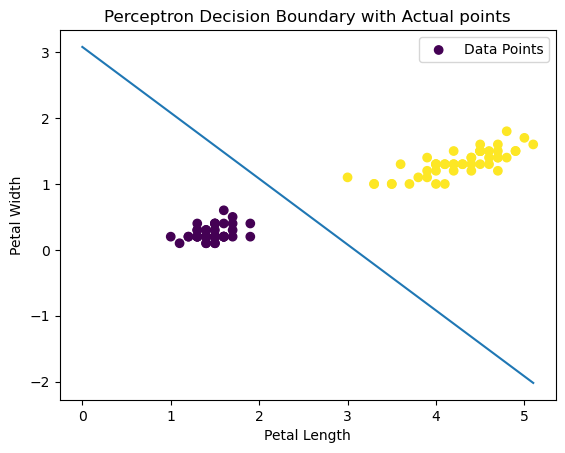

In [352]:
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Data Points')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Perceptron Decision Boundary with Actual points')
plt.legend()

# Decision boundary line
x_values = np.linspace(0, max(X[:,0]), 100)
y_values = (-weights[0] * x_values - bias) / weights[1]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.show()


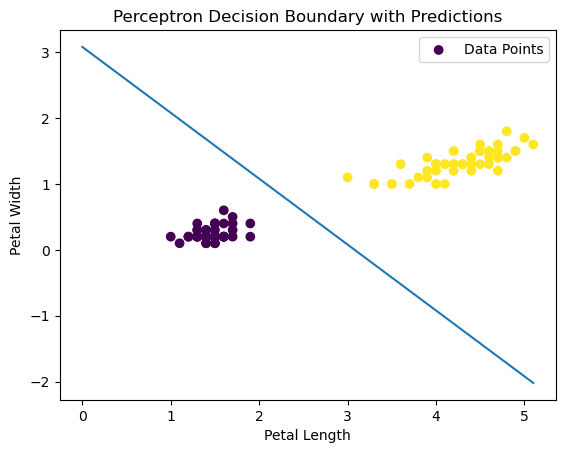

In [353]:
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis', label='Data Points')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Perceptron Decision Boundary with Predictions')
plt.legend()

# Decision boundary line
x_values = np.linspace(0, max(X[:,0]), 100)
y_values = (-weights[0] * x_values - bias) / weights[1]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.show()
